# Predicting Insurance Claims filed by Travelling Agencies

In [1]:
import pandas as pd
import numpy as np
from scipy import *
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import *
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import *
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from collections import Counter

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
# import warnings
# from sklearn.exceptions import DataConversionWarning
# warnings.filterwarnings(action='ignore', category=DataConversionWarning)
# from sklearn.exceptions import ConvergenceWarning
# warnings.filterwarnings("ignore", category=ConvergenceWarning)
# from sklearn.exceptions import FitFailedWarning
# warnings.filterwarnings("ignore", category=FitFailedWarning)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
df=pd.read_csv('travel insurance.csv',sep=',')
row,column=df.shape
print("The dataset has {} Rows and {} Columns".format(row,column))
print('')
cols=list(df.columns)
continous=list(set(df._get_numeric_data().columns)-{'Duration','Age'})
print("Columns : ",cols)
print("Continous Variables   : ",continous)
categorical=list(set(cols)-set(continous))
print("Categorical Variables : ",categorical)
# Duration and Age are categorical ( done in EDA part [Ayush_Project.ipynb] )
df_=df.copy()
df_['Gender']=df_['Gender'].fillna('N')

The dataset has 63326 Rows and 11 Columns

Columns :  ['Agency', 'Agency Type', 'Distribution Channel', 'Product Name', 'Claim', 'Duration', 'Destination', 'Net Sales', 'Commision (in value)', 'Gender', 'Age']
Continous Variables   :  ['Net Sales', 'Commision (in value)']
Categorical Variables :  ['Agency Type', 'Distribution Channel', 'Destination', 'Age', 'Duration', 'Claim', 'Agency', 'Product Name', 'Gender']


In [5]:
a=list(df_['Destination'].unique())
aa=list(df_['Agency'].unique())

In [6]:
df_ = df_[df_.Age != 118]
df_ = df_[df_.Duration >=0]
df_.loc[df_['Net Sales'] == 0.0, 'Commision (in value)'] = 0
print("Now the dataset  has {} Rows and {} Columns".format(df_.shape[0],df_.shape[1]))
print("%d records deleted from the dataset"%(df.shape[0]-df_.shape[0]))
df_=df_.reset_index().drop(columns='index')
df1=df_.copy()

Now the dataset  has 62342 Rows and 11 Columns
984 records deleted from the dataset


In [7]:
b=list(df_['Destination'].unique())
bb=list(df_['Agency'].unique())

In [8]:
new=[]
for i in a :
  if(i not in list(b)):
    print(i)
    new.append(i)
for i in aa:
  if(i not in list(bb)):
    print(i)
    new.append(i)

KOREA, DEMOCRATIC PEOPLE'S REPUBLIC OF
TIBET
JWT


In [9]:
#df.loc[df['Destination'].isin(new) ]#| df['Agency'].isin(new)]

In [10]:
# Label Encoding
le=LabelEncoder()
le_df=pd.DataFrame()
for i in list(set(df_.columns)-set(df_._get_numeric_data().columns)):
  le_df[i]=le.fit_transform(df_[i])
for j in list(df_._get_numeric_data().columns):
  le_df[j]=df_[j]
print("Label Encoded dataset  has {} Rows and {} Columns".format(le_df.shape[0],le_df.shape[1]))

Label Encoded dataset  has 62342 Rows and 11 Columns


In [11]:
relation=dict()
for l in list(set(df_.columns)-set(df_._get_numeric_data().columns)):
  indx=[]
  for x in df_[l].unique():
    #print(x,' ',df_.index[df_[l] == x].tolist()[0])
    indx.append(df_.index[df_[l] == x].tolist()[0])
  dic=dict(zip(le_df.loc[indx][l].to_list(),df_.loc[indx][l].to_list()))
  relation[l]=dic
  print(dic)

{1: 'Travel Agency', 0: 'Airlines'}
{0: 'Offline', 1: 'Online'}
{78: 'MALAYSIA', 4: 'AUSTRALIA', 61: 'ITALY', 138: 'UNITED STATES', 128: 'THAILAND', 95: 'NORWAY', 143: 'VIET NAM', 32: 'DENMARK', 117: 'SINGAPORE', 63: 'JAPAN', 137: 'UNITED KINGDOM', 57: 'INDONESIA', 56: 'INDIA', 26: 'CHINA', 41: 'FRANCE', 125: 'TAIWAN, PROVINCE OF CHINA', 101: 'PHILIPPINES', 87: 'MYANMAR', 53: 'HONG KONG', 67: 'KOREA, REPUBLIC OF', 136: 'UNITED ARAB EMIRATES', 88: 'NAMIBIA', 92: 'NEW ZEALAND', 28: 'COSTA RICA', 19: 'BRUNEI DARUSSALAM', 102: 'POLAND', 121: 'SPAIN', 31: 'CZECH REPUBLIC', 44: 'GERMANY', 122: 'SRI LANKA', 21: 'CAMBODIA', 5: 'AUSTRIA', 120: 'SOUTH AFRICA', 127: 'TANZANIA, UNITED REPUBLIC OF', 70: "LAO PEOPLE'S DEMOCRATIC REPUBLIC", 89: 'NEPAL', 90: 'NETHERLANDS', 76: 'MACAO', 29: 'CROATIA', 40: 'FINLAND', 23: 'CANADA', 130: 'TUNISIA', 109: 'RUSSIAN FEDERATION', 46: 'GREECE', 11: 'BELGIUM', 59: 'IRELAND', 124: 'SWITZERLAND', 25: 'CHILE', 60: 'ISRAEL', 8: 'BANGLADESH', 55: 'ICELAND', 103: 'POR

In [12]:
#OneHotEncoding
ohe=OneHotEncoder()
ohe_df=df_.copy()
for i in list(set(df_.columns)-set(df_._get_numeric_data().columns)-{'Claim'}):
  ohe_df = pd.get_dummies(ohe_df, columns=[i], prefix=[i] )
ohe_df=ohe_df.drop(columns='Claim')
print("One Hot Encoded dataset  has {} Rows and {} Columns".format(ohe_df.shape[0],ohe_df.shape[1]))

One Hot Encoded dataset  has 62342 Rows and 199 Columns


In [13]:
# Function to print the result after the prediction 
def print_result(y_test,y_pred):
  print("Confusion Matrix       : \n" ,confusion_matrix(y_test,y_pred))
  print("Accuracy of Model      : ",accuracy_score(y_test, y_pred))
  print("Precision of Model     : ",precision_score(y_test, y_pred))
  print("Recall of Model        : " , recall_score(y_test, y_pred))
  print("F1 Score of Model      : " ,f1_score(y_test, y_pred))
  print("ROC_AUC score of Model : " ,roc_auc_score(y_test,y_pred))	
  fpr, tpr, thresholds = roc_curve(y_test,y_pred)
  plt.figure(1)
  plt.plot([0, 1], [0, 1], 'k--')
  plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)'% roc_auc_score(y_test,y_pred))
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.legend(loc='best')

In [14]:
# Funtion to print the details after train-test split
def print_input(X_train, X_test, y_train, y_test):
  print("TRAIN(X_train) Feature set        : ",len(X_train))
  print("TRAIN(y_train) Label Feature set  : ",len(y_train))
  print("TEST (X_test)  Feature set        : ",len(X_test))
  print("TEST (y_test)  Label set          : ",len(y_test))
  print("-------For Training Set--------\n")
  print(y_train['Claim'].value_counts())
  l_1,l_2= y_train['Claim'].value_counts()
  print("Class Label 0 is : ",(l_1/y_train.shape[0])*100,"%")
  print("Class Label 1 is : ",(l_2/y_train.shape[0])*100,"%")
  print("\n-------For Testing Set--------\n")
  print(y_test['Claim'].value_counts())
  l_1,l_2= y_test['Claim'].value_counts()
  print("Class Label 0 is : ",(l_1/y_test.shape[0])*100,"%")
  print("Class Label 1 is : ",(l_2/y_test.shape[0])*100,"%")

In [15]:
# Function to balance the imbalanced classes 
def balance(X_train,y_train,typ,s=0.3):
  if(typ.lower() == 'ros'):
    rus=RandomOverSampler(random_state=21)
    x_res, y_res = rus.fit_sample(X_train, y_train)
    print('Dataset shape after Random Over Sampling', Counter(y_res))
    print('After ROS the number of Rows Training set has are  : ', x_res.shape[0])
  elif(typ.lower() == 'rus' ):
    ros=RandomUnderSampler(random_state=21)
    x_res, y_res = ros.fit_sample(X_train, y_train)
    print('Dataset shape after Random Under Sampling', Counter(y_res))
    print('After RUS the number of Rows Training set has are : ', x_res.shape[0])
  elif(typ.lower() == 'adasyn'):
    ada=ADASYN(random_state=21, sampling_strategy=s, n_jobs=-1)
    x_res, y_res = ada.fit_sample(X_train, y_train)
    print('Dataset shape after ADASYN', Counter(y_res))
    print('After ADASYN the number of Rows Training set has are : ', x_res.shape[0])
  elif(typ.lower() == 'smote'):
    smo=SMOTE(random_state=21, sampling_strategy=s, n_jobs=-1)
    x_rs, y_rs = smo.fit_sample(X_train, y_train)
    tom=TomekLinks(random_state=21)
    x_res, y_res = tom.fit_sample(x_rs,y_rs)
    print('Dataset shape after SMOTE + Tomek Links', Counter(y_res))
    print('After SMOTE Tomek the number of Rows Training set has are : ', x_res.shape[0])
  return x_res, y_res


In [16]:
# Function to plot the scatter plot of values it get by applying PCA
def plt_scatter(tmp_sample):
  plt.figure(figsize=(10,10))
  sns.scatterplot(x='Component 1',y='Component 2', hue='Label', data=tmp_sample)
  plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)


In [17]:
# Function to count the number of elements with Label 1 and Lable 0
def plt_print(temp):
  tmp_sample = temp.sample(frac = 0.10, random_state=21)
  tmp_sample = tmp_sample[tmp_sample['Component 1'] < 0.90 ]
  print(tmp_sample['Label'].value_counts())
  l_1,l_2= tmp_sample['Label'].value_counts()
  print("Class Label 0 is : ",(l_1/tmp_sample.shape[0])*100,"%")
  print("Class Label 1 is : ",(l_2/tmp_sample.shape[0])*100,"%")
  print(" ")
  plt_scatter(tmp_sample)

In [18]:
# Function to plot the graph 
def plot_graph(X_train,y_train):
  pca=PCA(n_components=2) 
  dim=pca.fit_transform(X_train)
  scaler=MinMaxScaler()
  res=scaler.fit_transform(dim)
  temp= pd.DataFrame(res,columns=['Component 1', 'Component 2'])
  y_temp=y_train.copy()
  y_temp=y_temp.reset_index()
  temp['Label'] = y_temp['Claim']
  plt_print(temp)

In [19]:
# Function to plot the graph 
def plt_graph(X_train,y_train):
  pca=PCA(n_components=2) 
  dim=pca.fit_transform(X_train)
  scaler=MinMaxScaler()
  res=scaler.fit_transform(dim)
  temp= pd.DataFrame(res,columns=['Component 1', 'Component 2'])
  y_temp=y_train.copy()
  temp['Label'] = y_temp
  plt_print(temp)

In [20]:
# Function to print precision , recall, Accuracy and F1 score
def calc(TP,TN,FP,FN):
  if(TP==0):
    TP=0.00000000000000001
  if(FP==0):
    FP=0.00000000000000001
  if(FN==0):
    FN=0.00000000000000001
  conf_mat=[[TN,FP],[FN,TP]]
  precision=(TP/(TP+FP))
  recall= (TP/(TP+FN))
  f1=((2*recall*precision)/(recall+precision))
  accuracy=((TP+TN)/(TP+TN+FP+FN))
  TPR=(TP/(TP+FN))
  FPR=(FP/(FP+TN))
  print("Confusion Matrix       : \n" ,conf_mat[0],'\n',conf_mat[1])
  print("Accuracy of Model      : ", accuracy)
  print("Precision of Model     : ", precision)
  print("Recall of Model        : ", recall)
  print("F1 Score of Model      : ", f1)

In [21]:
# Function to compute the value of TP, TN, FP, FN
def comp(y_test,y_pred):
  TP=0
  TN=0
  FP=0
  FN=0
  for i in range(0,len(y_pred)):
    if (int(y_test.iloc[i]) == 1 and y_pred[i] == 1):
      TP+=1
    elif (int(y_test.iloc[i]) == 1 and y_pred[i] == 0 ):
      FN+=1
    elif (int(y_test.iloc[i]) == 0 and y_pred[i] == 1 ):
      FP+=1
    elif (int(y_test.iloc[i]) == 0 and y_pred[i] == 0 ):
      TN+=1
  print("{0} {1} {2} {3}".format(TP,TN,FP,FN))
  calc(TP,TN,FP,FN)

In [22]:
# Funtion to get the predicted value via probability 
def thresh(y_thresh,val=0.5):
  y_pred=[]
  for i in range(0,len(y_thresh)):
    if(y_thresh[i][0] >= val):
      y_pred.append(0)
    else:
      y_pred.append(1)
  y_pred=np.array(y_pred)
  return y_pred


In [23]:
# Function to plot the mapping of 4 Buckets 
def plot_buk(val,new_dff):
  nn=[['TP','TN'],['FP','FN']]
  f, axes = plt.subplots(2, 2)
  f.set_size_inches(15,10)
  for i in range(2):
    for j in range(2):
      sns.countplot(x=val,hue=nn[i][j],data=new_dff,ax=axes[i][j])
      sns.countplot(x=val,hue=nn[i][j],data=new_dff,ax=axes[i][j])
      sns.countplot(x=val,hue=nn[i][j],data=new_dff,ax=axes[i][j])
      sns.countplot(x=val,hue=nn[i][j],data=new_dff,ax=axes[i][j])

In [24]:
# Function to Compare all the four buckets ( TP, TN, FP, FN) of the top 10% imp features
def comp_feat(X_test,y_test,y_pred,f=0):
  new=X_test.copy()
  new=new.reset_index()
  new=new.drop(columns='index')
  new['Actual']=y_test.values
  new['Predicted']=y_pred
  for i in range(0,len(new)):
    if   (int(new.iloc[i]['Actual']) == 1 and int(new.iloc[i]['Predicted']) == 1 ):
      new.loc[i,'TP'] = 1
    elif (int(new.iloc[i]['Actual']) == 1 and int(new.iloc[i]['Predicted']) == 0 ):
      new.loc[i,'FN'] = 1
    elif (int(new.iloc[i]['Actual']) == 0 and int(new.iloc[i]['Predicted']) == 1 ):
      new.loc[i,'FP'] = 1
    elif (int(new.iloc[i]['Actual']) == 0 and int(new.iloc[i]['Predicted']) == 0 ):
      new.loc[i,'TN'] = 1
  if (f==0):
    new=new.fillna(0)
  return(new)  

In [68]:
def reason(df,h):
  l=[]
  i=0
  while(len(l)<5):
    n=['Age','Duration','Net Sales','Commision (in value)']
    if(h[i] not in n):
      l.append(h[i])
    i+=1
  #print(l)
  for j in range(0,len(df)):
    nn=[]
    for k in l:
      if (int(df.loc[j][k]) == 1):
        nn.append(k)
        #print(k)
    #print(nn) 
    
    #print(s) 
    if (len(nn) >= 2):
      s = ', '.join(nn) + ' were present'
    elif (len(nn) == 1):
      s = ', '.join(nn) + ' was present'
    else:
      s = ''
    nn_=list(set(l)-set(nn))
    if (len(nn_) >= 2):
      s_ = ', '.join(nn_) + ' were not present'
    elif (len(nn_) == 1):
      s_ = ', '.join(nn) + ' was not present'
    else:
      s_ = ''
    if (len(nn) == 0):
      st = s_
    elif (len(nn_) == 0):
      st = s
    else :
      st = s + ' and '+ s_
    #print(s)
    df.loc[j, 'Reasoning'] = st 
  return(df)

In [26]:
target = pd.DataFrame(le_df['Claim'])
le_df=le_df.drop(columns='Claim')

# MODEL TRAINING

In [27]:
X_train, X_test, y_train, y_test = train_test_split(ohe_df,target,test_size = 0.25, random_state = 21, stratify = target)
print_input(X_train, X_test, y_train, y_test)
X_u_train, y_u_train = balance(X_train, y_train.values.ravel(),'rus')
X_o_train, y_o_train = balance(X_train, y_train.values.ravel(),'ros')
X_s_train, y_s_train = balance(X_train, y_train.values.ravel(),'smote',0.5)
X_a_train, y_a_train = balance(X_train, y_train.values.ravel(),'adasyn',0.5)

TRAIN(X_train) Feature set        :  46756
TRAIN(y_train) Label Feature set  :  46756
TEST (X_test)  Feature set        :  15586
TEST (y_test)  Label set          :  15586
-------For Training Set--------

0    46068
1      688
Name: Claim, dtype: int64
Class Label 0 is :  98.52853109761314 %
Class Label 1 is :  1.4714689023868595 %

-------For Testing Set--------

0    15357
1      229
Name: Claim, dtype: int64
Class Label 0 is :  98.53073270884127 %
Class Label 1 is :  1.4692672911587321 %
Dataset shape after Random Under Sampling Counter({0: 688, 1: 688})
After RUS the number of Rows Training set has are :  1376
Dataset shape after Random Over Sampling Counter({0: 46068, 1: 46068})
After ROS the number of Rows Training set has are  :  92136
Dataset shape after SMOTE + Tomek Links Counter({0: 45752, 1: 23034})
After SMOTE Tomek the number of Rows Training set has are :  68786
Dataset shape after ADASYN Counter({0: 46068, 1: 22899})
After ADASYN the number of Rows Training set has are 

## With HyperParameter Tuning

In [28]:
clf_dt = RandomForestClassifier()
param_grid = {
   'max_leaf_nodes': [ 40,50 ],
   'class_weight' : ['balanced'],
   'criterion' :['gini','entropy'] ,
   'max_depth' : [ 30, 50, 100 ],
   'min_samples_split': [ 2, 3, 4],
   'random_state': [42]
    }

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=30, max_features='auto',
                       max_leaf_nodes=50, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
Confusion Matrix       : 
 [[12448  2909]
 [   69   160]]
Accuracy of Model      :  0.8089310920056461
Precision of Model     :  0.05213424568263278
Recall of Model        :  0.6986899563318777
F1 Score of Model      :  0.09702850212249849
ROC_AUC score of Model :  0.7546324692123673


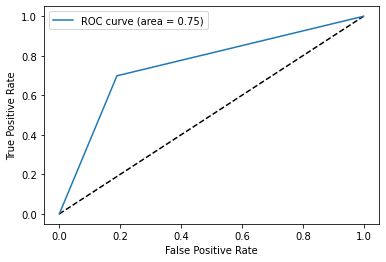

In [29]:
CV_dt = GridSearchCV(estimator=clf_dt, param_grid=param_grid, cv= 3)
CV_dt.fit(X_u_train, y_u_train)
clf_best_dt = CV_dt.best_estimator_
print(clf_best_dt)
y_pred = clf_best_dt.predict(X_test)
print_result(y_test=y_test,y_pred=y_pred)

# Feature Selection 

In [30]:
# hyper parameter
hyp=pd.DataFrame({'Percent' : clf_best_dt.feature_importances_ , 'col' : ohe_df.columns}).sort_values(by='Percent',ascending=False)
hyp[:19]

,Percent,col
1,0.127304,Net Sales
2,0.112015,Commision (in value)
0,0.084911,Duration
198,0.080020,Gender_N
125,0.072258,Destination_SINGAPORE
157,0.065970,Agency_C2B
3,0.050689,Age
4,0.041484,Agency Type_Airlines
5,0.038721,Agency Type_Travel Agency
180,0.033407,Product Name_Cancellation Plan


In [31]:
h=hyp['col'][0:19].to_list()

# Comparing Feature selction for each TP, TN, FP, FN

### With Hyperparameter tuning

In [32]:
h

['Net Sales',
 'Commision (in value)',
 'Duration',
 'Gender_N',
 'Destination_SINGAPORE',
 'Agency_C2B',
 'Age',
 'Agency Type_Airlines',
 'Agency Type_Travel Agency',
 'Product Name_Cancellation Plan',
 'Agency_EPX',
 'Gender_F',
 'Product Name_Basic Plan',
 'Product Name_Bronze Plan',
 'Agency_JZI',
 'Product Name_2 way Comprehensive Plan',
 'Product Name_Silver Plan',
 'Agency_LWC',
 'Destination_CHINA']

In [33]:
new_df=comp_feat(X_test,y_test,y_pred)

In [34]:
n=['TP','TN','FP','FN','Actual','Predicted']
for i in n:
  h.append(i)
new_df=new_df[h]


In [35]:
new_df

,Net Sales,Commision (in value),Duration,Gender_N,Destination_SINGAPORE,Agency_C2B,Age,Agency Type_Airlines,Agency Type_Travel Agency,Product Name_Cancellation Plan,Agency_EPX,Gender_F,Product Name_Basic Plan,Product Name_Bronze Plan,Agency_JZI,Product Name_2 way Comprehensive Plan,Product Name_Silver Plan,Agency_LWC,Destination_CHINA,TP,TN,FP,FN,Actual,Predicted
0,20.0,0.00,21,1,0,0,34,0,1,0,1,0,0,0,0,1,0,0,1,0.0,1.0,0.0,0.0,0,0
1,24.0,0.00,47,1,0,0,36,0,1,0,1,0,0,0,0,1,0,0,0,0.0,1.0,0.0,0.0,0,0
2,-59.4,35.64,61,1,0,0,60,0,1,0,0,0,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0,0,0
3,80.0,0.00,63,1,0,0,36,0,1,1,1,0,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0,0,0
4,28.0,0.00,79,1,0,0,36,0,1,1,1,0,0,0,0,0,0,0,1,0.0,1.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15581,29.0,0.00,77,1,0,0,36,0,1,0,1,0,0,0,0,1,0,0,0,0.0,1.0,0.0,0.0,0,0
15582,15.0,0.00,4,1,0,0,36,0,1,1,1,0,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0,0,0
15583,26.0,9.10,40,0,0,0,44,1,0,0,0,0,1,0,1,0,0,0,1,0.0,1.0,0.0,0.0,0,0
15584,72.0,18.00,35,0,1,1,39,1,0,0,0,1,0,0,0,0,1,0,0,0.0,0.0,1.0,0.0,0,1


In [36]:
new_dff=comp_feat(X_test,y_test,y_pred,1)

In [37]:
new_dff=new_dff[h]


In [38]:
new_dff

,Net Sales,Commision (in value),Duration,Gender_N,Destination_SINGAPORE,Agency_C2B,Age,Agency Type_Airlines,Agency Type_Travel Agency,Product Name_Cancellation Plan,Agency_EPX,Gender_F,Product Name_Basic Plan,Product Name_Bronze Plan,Agency_JZI,Product Name_2 way Comprehensive Plan,Product Name_Silver Plan,Agency_LWC,Destination_CHINA,TP,TN,FP,FN,Actual,Predicted
0,20.0,0.00,21,1,0,0,34,0,1,0,1,0,0,0,0,1,0,0,1,NaN,1.0,NaN,NaN,0,0
1,24.0,0.00,47,1,0,0,36,0,1,0,1,0,0,0,0,1,0,0,0,NaN,1.0,NaN,NaN,0,0
2,-59.4,35.64,61,1,0,0,60,0,1,0,0,0,0,0,0,0,0,0,0,NaN,1.0,NaN,NaN,0,0
3,80.0,0.00,63,1,0,0,36,0,1,1,1,0,0,0,0,0,0,0,0,NaN,1.0,NaN,NaN,0,0
4,28.0,0.00,79,1,0,0,36,0,1,1,1,0,0,0,0,0,0,0,1,NaN,1.0,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15581,29.0,0.00,77,1,0,0,36,0,1,0,1,0,0,0,0,1,0,0,0,NaN,1.0,NaN,NaN,0,0
15582,15.0,0.00,4,1,0,0,36,0,1,1,1,0,0,0,0,0,0,0,0,NaN,1.0,NaN,NaN,0,0
15583,26.0,9.10,40,0,0,0,44,1,0,0,0,0,1,0,1,0,0,0,1,NaN,1.0,NaN,NaN,0,0
15584,72.0,18.00,35,0,1,1,39,1,0,0,0,1,0,0,0,0,1,0,0,NaN,NaN,1.0,NaN,0,1


##Graph

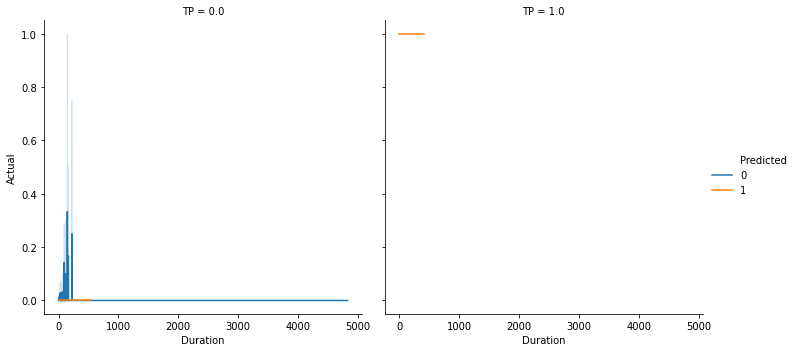

In [39]:
sns.relplot(x="Duration", y="Actual",hue="Predicted", col='TP', kind="line", data=new_df);

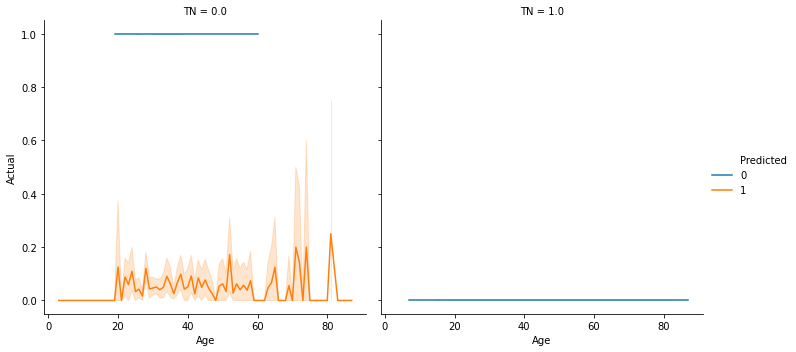

In [40]:
sns.relplot(x="Age", y="Actual",hue="Predicted", col='TN', kind="line", data=new_df);

In [41]:
#sns.pairplot(new_dff,hue='TP')

In [42]:
con=['TP','TN','FP','FN','Actual','Predicted','Commision (in value)', 'Net Sales','Duration','Age']
l_n=h.copy()
for i in con:
  l_n.remove(i)

In [43]:
ll=iter(l_n)

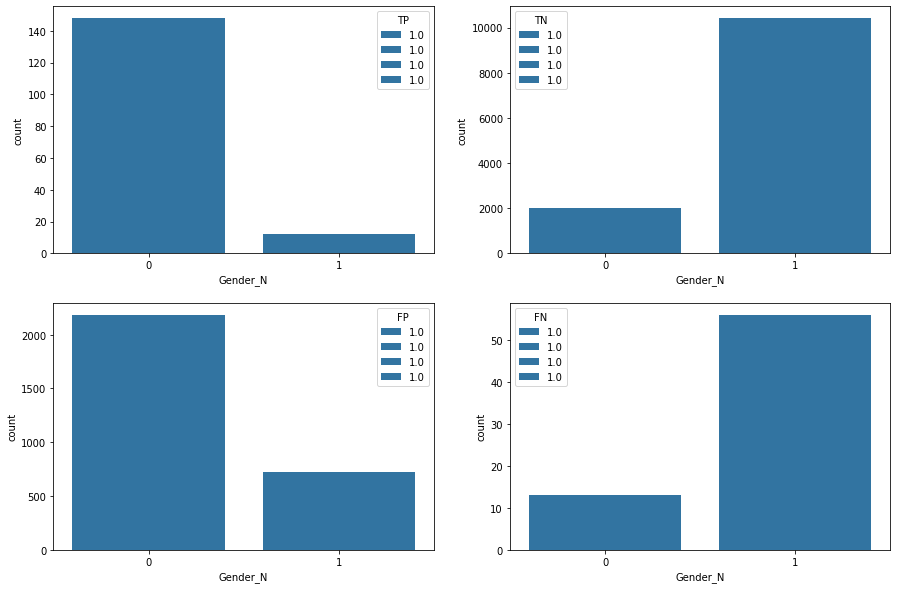

In [44]:
plot_buk(next(ll),new_dff)

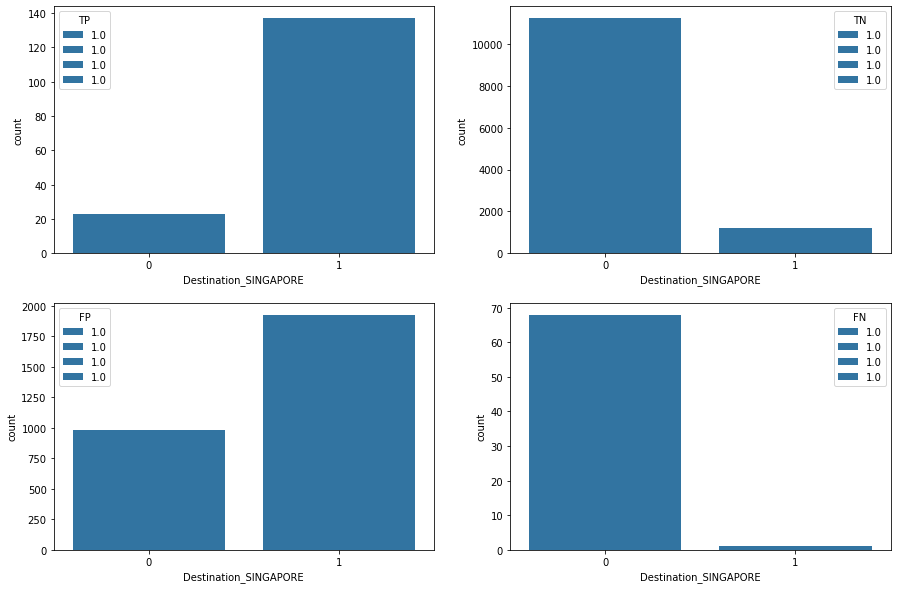

In [45]:
plot_buk(next(ll),new_dff)

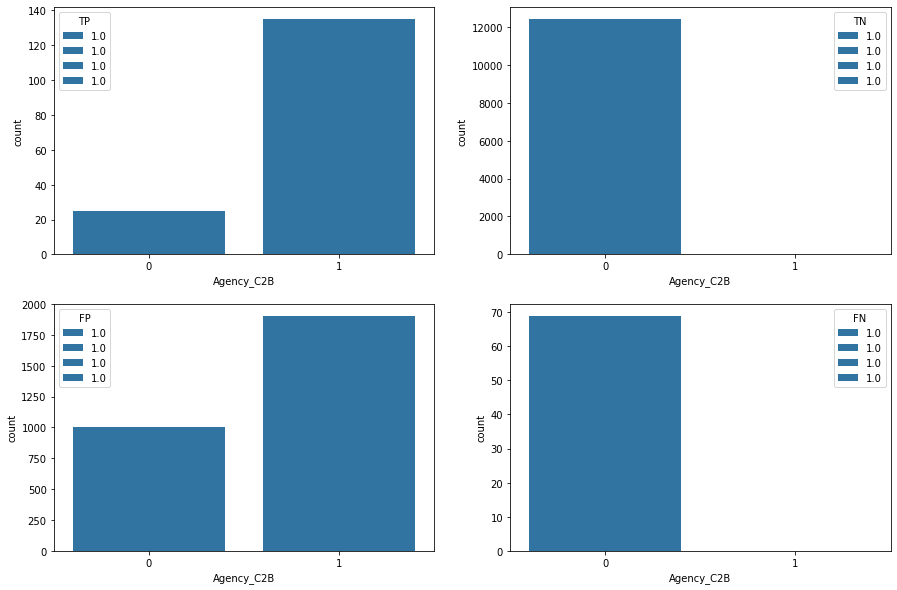

In [46]:
plot_buk(next(ll),new_dff)

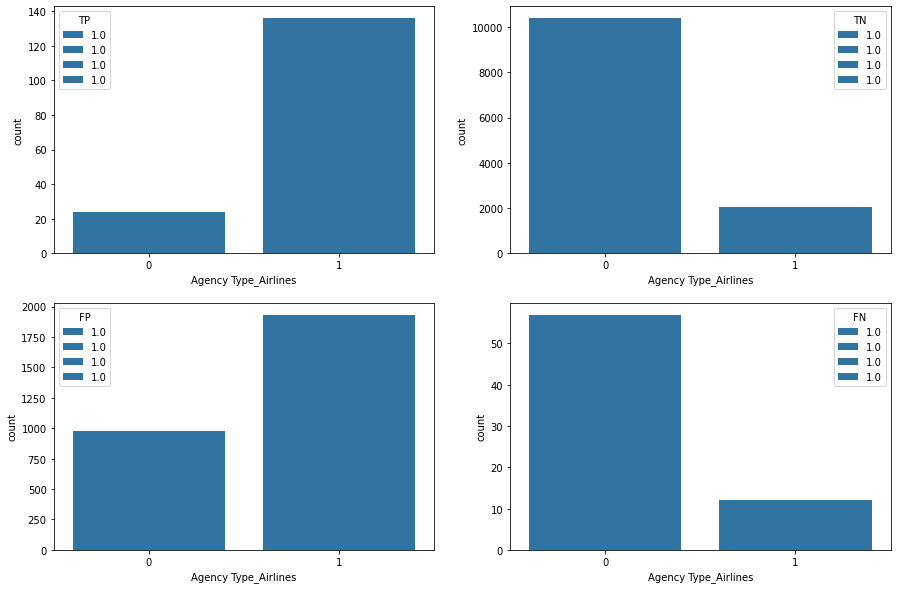

In [47]:
plot_buk(next(ll),new_dff)

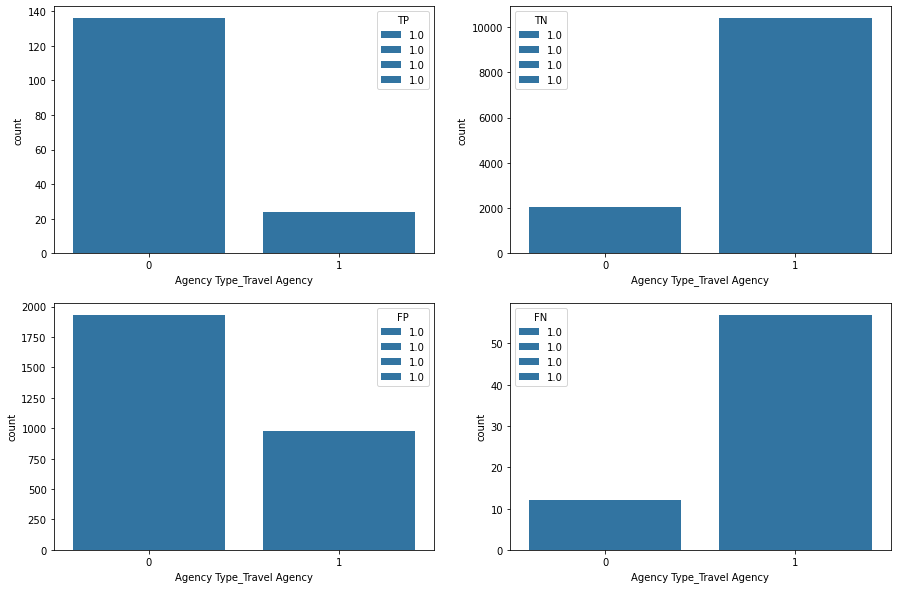

In [48]:
plot_buk(next(ll),new_dff)

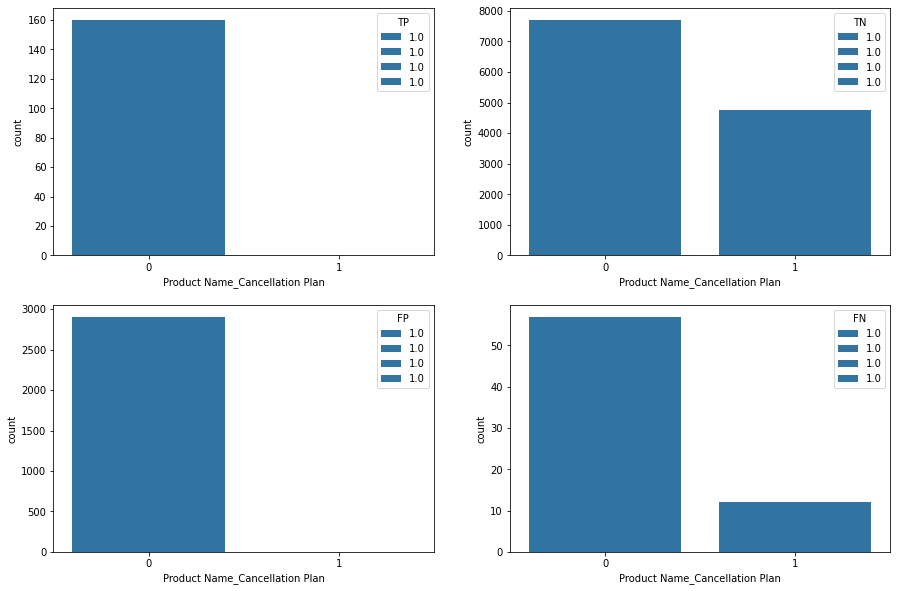

In [49]:
plot_buk(next(ll),new_dff)

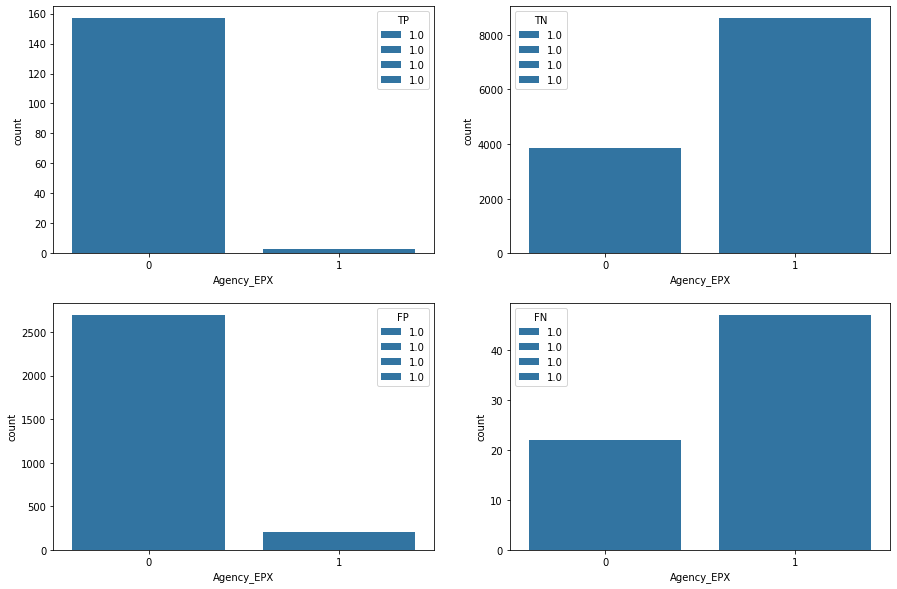

In [50]:
plot_buk(next(ll),new_dff)

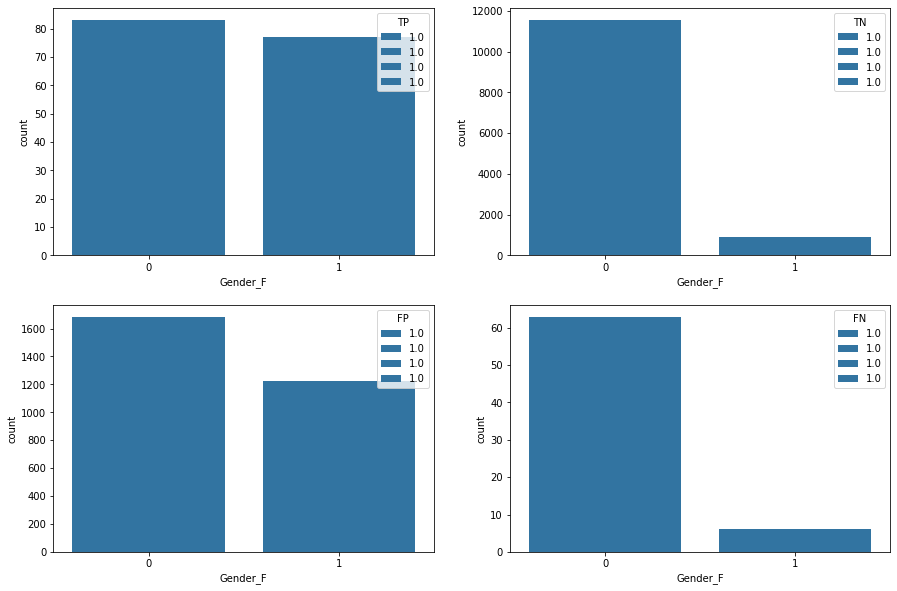

In [51]:
plot_buk(next(ll),new_dff)

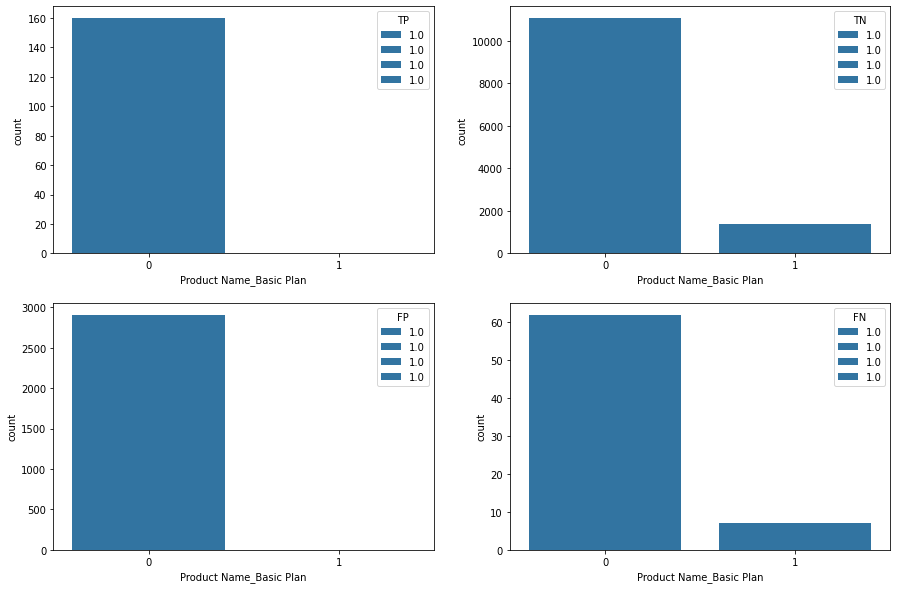

In [52]:
plot_buk(next(ll),new_dff)

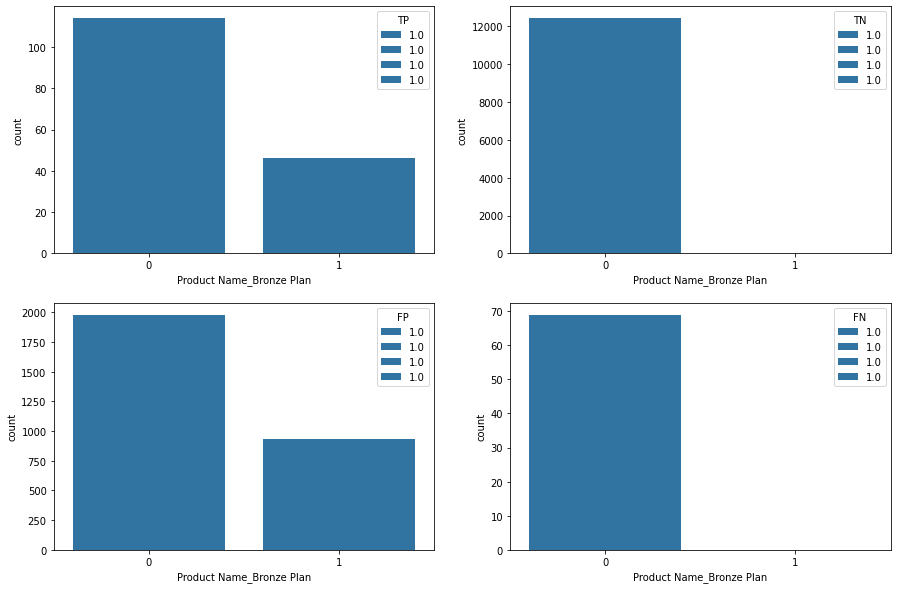

In [53]:
plot_buk(next(ll),new_dff)

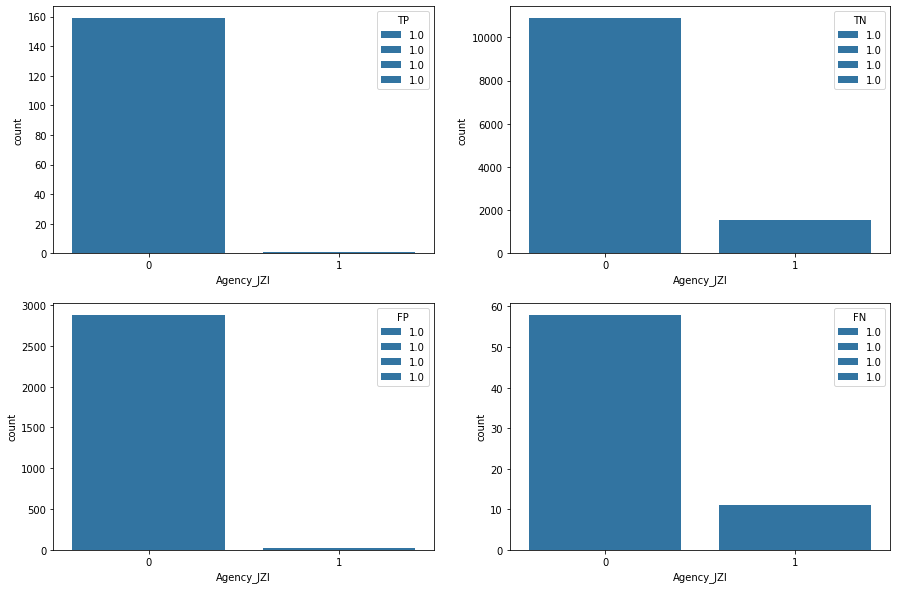

In [54]:
plot_buk(next(ll),new_dff)

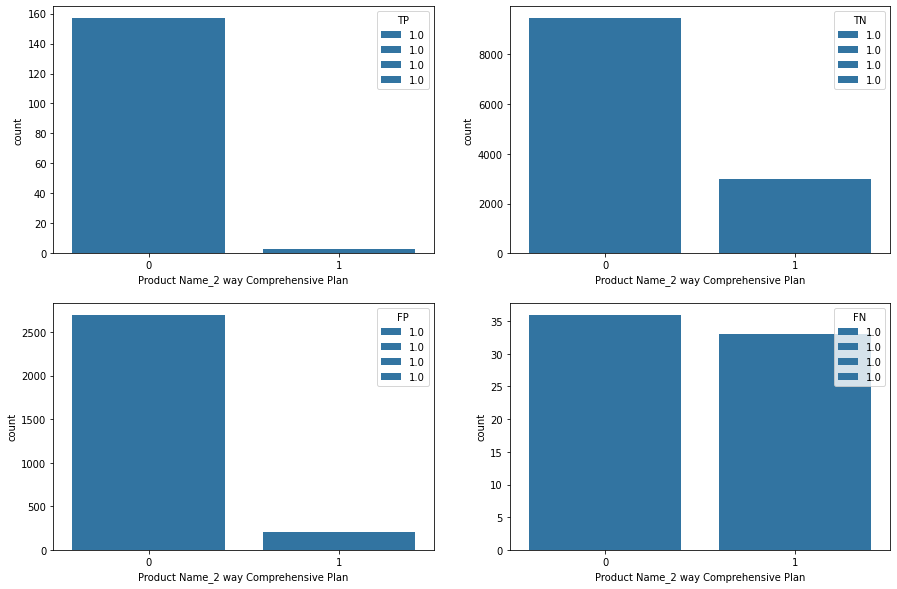

In [55]:
plot_buk(next(ll),new_dff)

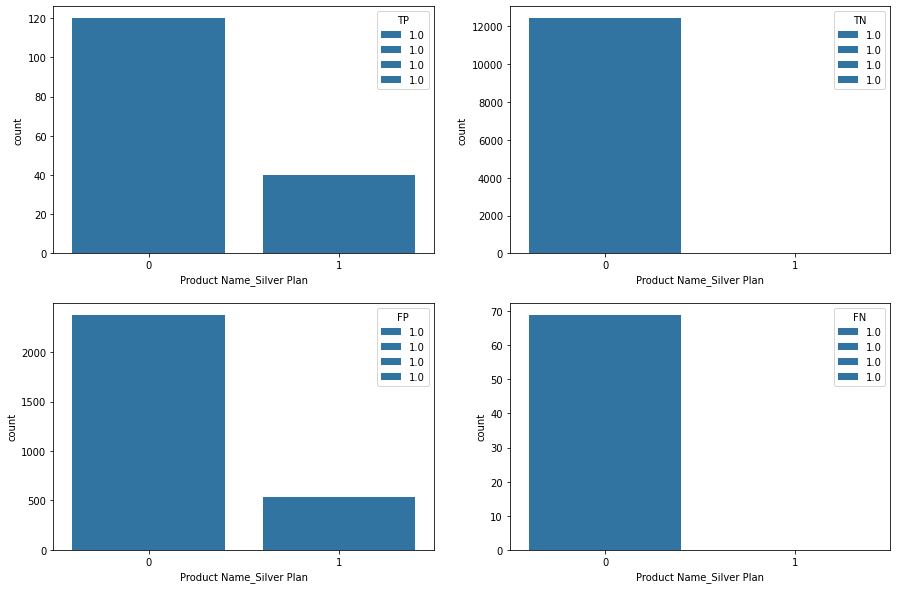

In [56]:
plot_buk(next(ll),new_dff)

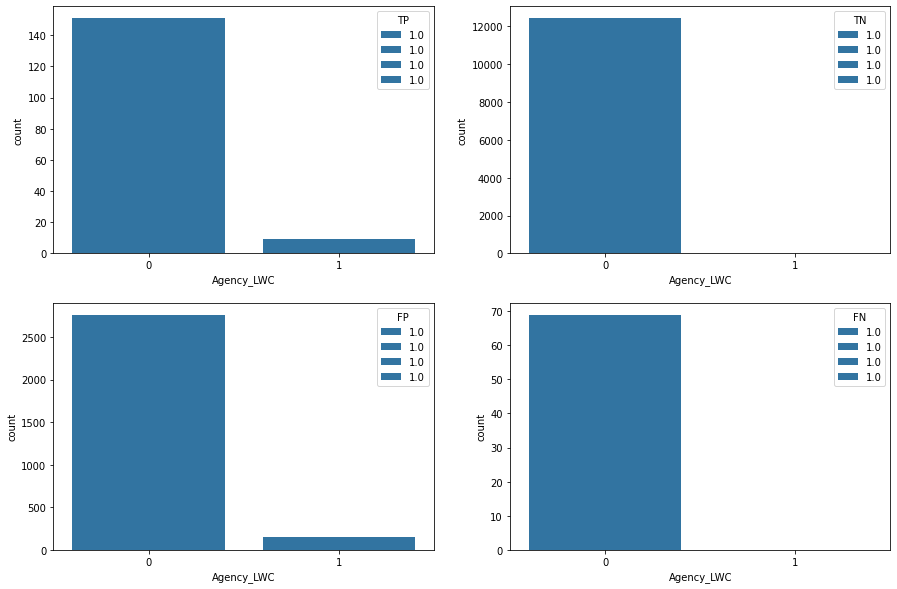

In [57]:
plot_buk(next(ll),new_dff)

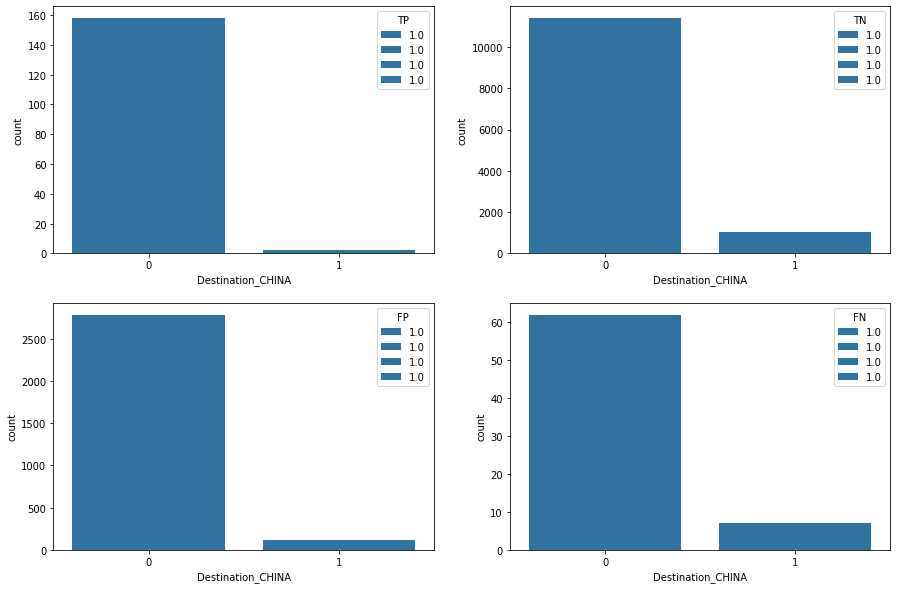

In [58]:
plot_buk(next(ll),new_dff)

# Reasoning 

In [69]:
df_res=reason(new_df,h)
df_res.head()

,Net Sales,Commision (in value),Duration,Gender_N,Destination_SINGAPORE,Agency_C2B,Age,Agency Type_Airlines,Agency Type_Travel Agency,Product Name_Cancellation Plan,Agency_EPX,Gender_F,Product Name_Basic Plan,Product Name_Bronze Plan,Agency_JZI,Product Name_2 way Comprehensive Plan,Product Name_Silver Plan,Agency_LWC,Destination_CHINA,TP,TN,FP,FN,Actual,Predicted,Reasoning
0,20.0,0.00,21,1,0,0,34,0,1,0,1,0,0,0,0,1,0,0,1,0.0,1.0,0.0,0.0,0,0,"Gender_N, Agency Type_Travel Agency were prese..."
1,24.0,0.00,47,1,0,0,36,0,1,0,1,0,0,0,0,1,0,0,0,0.0,1.0,0.0,0.0,0,0,"Gender_N, Agency Type_Travel Agency were prese..."
2,-59.4,35.64,61,1,0,0,60,0,1,0,0,0,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0,0,0,"Gender_N, Agency Type_Travel Agency were prese..."
3,80.0,0.00,63,1,0,0,36,0,1,1,1,0,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0,0,0,"Gender_N, Agency Type_Travel Agency were prese..."
4,28.0,0.00,79,1,0,0,36,0,1,1,1,0,0,0,0,0,0,0,1,0.0,1.0,0.0,0.0,0,0,"Gender_N, Agency Type_Travel Agency were prese..."


In [70]:
df_res[df_res['Actual'] == 1]

,Net Sales,Commision (in value),Duration,Gender_N,Destination_SINGAPORE,Agency_C2B,Age,Agency Type_Airlines,Agency Type_Travel Agency,Product Name_Cancellation Plan,Agency_EPX,Gender_F,Product Name_Basic Plan,Product Name_Bronze Plan,Agency_JZI,Product Name_2 way Comprehensive Plan,Product Name_Silver Plan,Agency_LWC,Destination_CHINA,TP,TN,FP,FN,Actual,Predicted,Reasoning
67,432.00,108.00,367,0,1,1,52,1,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,1,1,"Destination_SINGAPORE, Agency_C2B, Agency Type..."
115,62.25,15.56,11,0,1,1,33,1,0,0,0,0,0,0,0,0,1,0,0,1.0,0.0,0.0,0.0,1,1,"Destination_SINGAPORE, Agency_C2B, Agency Type..."
149,39.00,9.75,70,0,1,1,36,1,0,0,0,1,0,0,0,0,1,0,0,1.0,0.0,0.0,0.0,1,1,"Destination_SINGAPORE, Agency_C2B, Agency Type..."
207,252.85,63.21,413,0,1,1,31,1,0,0,0,1,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,1,1,"Destination_SINGAPORE, Agency_C2B, Agency Type..."
236,29.50,7.38,11,0,1,1,33,1,0,0,0,0,0,1,0,0,0,0,0,1.0,0.0,0.0,0.0,1,1,"Destination_SINGAPORE, Agency_C2B, Agency Type..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15345,26.50,6.63,52,0,1,1,74,1,0,0,0,0,0,1,0,0,0,0,0,1.0,0.0,0.0,0.0,1,1,"Destination_SINGAPORE, Agency_C2B, Agency Type..."
15425,27.00,6.75,10,0,1,1,23,1,0,0,0,0,0,1,0,0,0,0,0,1.0,0.0,0.0,0.0,1,1,"Destination_SINGAPORE, Agency_C2B, Agency Type..."
15433,22.10,5.53,31,0,1,1,24,1,0,0,0,1,0,1,0,0,0,0,0,1.0,0.0,0.0,0.0,1,1,"Destination_SINGAPORE, Agency_C2B, Agency Type..."
15459,252.85,63.21,367,0,1,1,45,1,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,1,1,"Destination_SINGAPORE, Agency_C2B, Agency Type..."


In [71]:
print(df_res[['Predicted','Reasoning']])

       Predicted                                          Reasoning
0              0  Gender_N, Agency Type_Travel Agency were prese...
1              0  Gender_N, Agency Type_Travel Agency were prese...
2              0  Gender_N, Agency Type_Travel Agency were prese...
3              0  Gender_N, Agency Type_Travel Agency were prese...
4              0  Gender_N, Agency Type_Travel Agency were prese...
...          ...                                                ...
15581          0  Gender_N, Agency Type_Travel Agency were prese...
15582          0  Gender_N, Agency Type_Travel Agency were prese...
15583          0  Agency Type_Airlines was present and Gender_N,...
15584          1  Destination_SINGAPORE, Agency_C2B, Agency Type...
15585          0  Gender_N, Agency Type_Travel Agency were prese...

[15586 rows x 2 columns]


In [74]:
print(df_res[['Actual', 'Predicted', 'Reasoning']][0:15].to_string())

    Actual  Predicted                                                                                                                      Reasoning
0        0          0  Gender_N, Agency Type_Travel Agency were present and Destination_SINGAPORE, Agency Type_Airlines, Agency_C2B were not present
1        0          0  Gender_N, Agency Type_Travel Agency were present and Destination_SINGAPORE, Agency Type_Airlines, Agency_C2B were not present
2        0          0  Gender_N, Agency Type_Travel Agency were present and Destination_SINGAPORE, Agency Type_Airlines, Agency_C2B were not present
3        0          0  Gender_N, Agency Type_Travel Agency were present and Destination_SINGAPORE, Agency Type_Airlines, Agency_C2B were not present
4        0          0  Gender_N, Agency Type_Travel Agency were present and Destination_SINGAPORE, Agency Type_Airlines, Agency_C2B were not present
5        0          0  Gender_N, Agency Type_Travel Agency were present and Destination_SINGAPORE, Agency 

In [80]:
print(df_res[df_res['TP'] == 1][['Actual', 'Predicted', 'Reasoning']][0:15].to_string())

      Actual  Predicted                                                                                                                      Reasoning
67         1          1  Destination_SINGAPORE, Agency_C2B, Agency Type_Airlines were present and Gender_N, Agency Type_Travel Agency were not present
115        1          1  Destination_SINGAPORE, Agency_C2B, Agency Type_Airlines were present and Gender_N, Agency Type_Travel Agency were not present
149        1          1  Destination_SINGAPORE, Agency_C2B, Agency Type_Airlines were present and Gender_N, Agency Type_Travel Agency were not present
207        1          1  Destination_SINGAPORE, Agency_C2B, Agency Type_Airlines were present and Gender_N, Agency Type_Travel Agency were not present
236        1          1  Destination_SINGAPORE, Agency_C2B, Agency Type_Airlines were present and Gender_N, Agency Type_Travel Agency were not present
336        1          1   Agency Type_Travel Agency was present and Gender_N, Destination_SING

# Threshold

In [63]:
x=np.linspace(0.5,0.95,10)
x

array([0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])

In [64]:
# cv=3
y_prob = clf_best_dt.predict_proba(X_test)
y_prob

array([[0.71448865, 0.28551135],
       [0.7824823 , 0.2175177 ],
       [0.70648454, 0.29351546],
       ...,
       [0.76229379, 0.23770621],
       [0.16409457, 0.83590543],
       [0.79994547, 0.20005453]])

In [65]:
# CV= 3
for i in x:
  print("\n Threshold => ",i,'\n')
  comp(y_test,thresh(y_prob,i))
#Best threshold = 0.60


 Threshold =>  0.5 

160 12448 2909 69
Confusion Matrix       : 
 [12448, 2909] 
 [69, 160]
Accuracy of Model      :  0.8089310920056461
Precision of Model     :  0.05213424568263278
Recall of Model        :  0.6986899563318777
F1 Score of Model      :  0.09702850212249849

 Threshold =>  0.55 

168 11913 3444 61
Confusion Matrix       : 
 [11913, 3444] 
 [61, 168]
Accuracy of Model      :  0.7751186962658796
Precision of Model     :  0.046511627906976744
Recall of Model        :  0.7336244541484717
F1 Score of Model      :  0.08747721947409529

 Threshold =>  0.6 

181 11179 4178 48
Confusion Matrix       : 
 [11179, 4178] 
 [48, 181]
Accuracy of Model      :  0.7288592326446811
Precision of Model     :  0.041523285157146136
Recall of Model        :  0.7903930131004366
F1 Score of Model      :  0.07890148212728858

 Threshold =>  0.65 

193 10209 5148 36
Confusion Matrix       : 
 [10209, 5148] 
 [36, 193]
Accuracy of Model      :  0.6673938149621456
Precision of Model     :  0.03613